In [ ]:
!pip install adversarial-robustness-toolbox
import warnings

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np

from art.estimators.classification import KerasClassifier
from tensorflow.keras import datasets
from art.utils import load_mnist
warnings.filterwarnings('ignore')

In [10]:
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 64)         

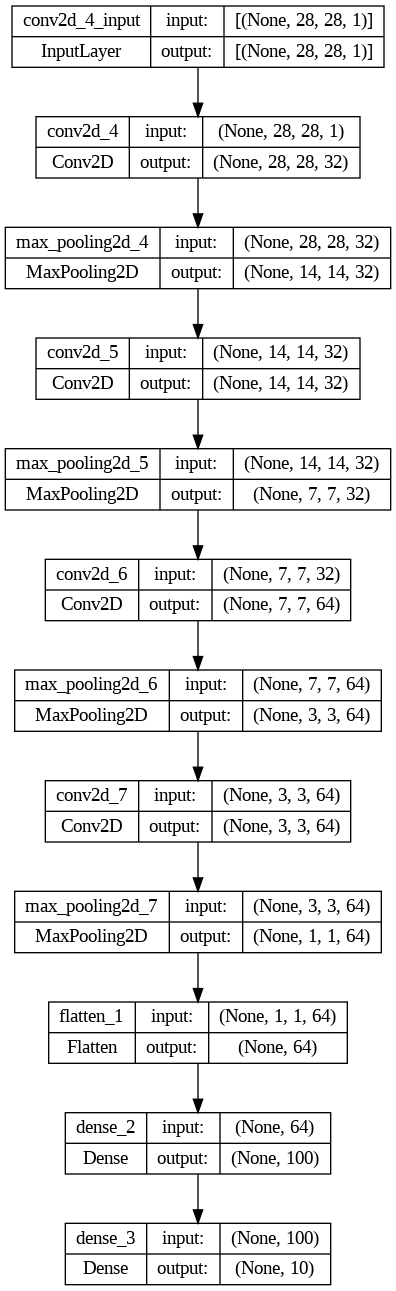

In [12]:
# Plot the model architecture to a file
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
from datetime import datetime
Start_time_1 = datetime.now()

In [16]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.002), metrics=["accuracy"])

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)

classifier.fit(x_train, y_train, batch_size=64, nb_epochs=100)

In [17]:
End_time_1 = datetime.now()

print('Time taken to train the model: {}'.format(End_time_1 - Start_time_1))

predictions = classifier.predict(x_test)
prediction_image = classifier.predict(x_test)
accuracy = np.sum(np.argmax(prediction_image, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))



Time taken to train the model: 0:08:52.118964
Accuracy on benign test examples: 99.14%


In [18]:
model.save("mnist_trained_runtimeT4GPU_model.h5")